In [27]:
###Import the usual libraries

import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

from uncertainties import ufloat

import matplotlib
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24}) #make plots more readable

import MagellanicStream as ms
import astropy.units as u
from astropy.coordinates import SkyCoord
from uncertainties import ufloat

import warnings
warnings.filterwarnings('ignore')

In [10]:
###ellipse
def ell(gaia_table,mult_fact):
    x = gaia_table['pmra']
    y = gaia_table['pmdec']
    h = np.nanmedian(gaia_table['pmra'])
    k = np.nanmedian(gaia_table['pmdec'])
    amad = mult_fact*mad(gaia_table['pmra'])
    bmad = mult_fact*mad(gaia_table['pmdec']) 
    return ((x-h)**2/amad**2)+((y-k)**2/bmad**2)

###Median Absolute Deviation
def mad(xdata):
    return np.nanmedian(np.absolute(xdata-np.nanmedian(xdata)))

In [11]:
#Read in stars identified as red giants from gaia
lid = ascii.read('/Users/joshpovick/Desktop/Research/MS_young/lidrg.dat')
sid = ascii.read('/Users/joshpovick/Desktop/Research/MS_young/sidrg.dat')

filepathl = '/Users/joshpovick/Desktop/Research/fits/gaialmcper_1degdia.fits' #ra: 64.24290029 dec:-76.4305723
filepaths = '/Users/joshpovick/Desktop/Research/fits/gaiasmcper_1degdia.fits' #ra: 24.05542837 dec:-74.78460052

lmc = fits.getdata(filepathl,1)
smc = fits.getdata(filepaths,1)

lid = np.array(lid)
sid = np.array(sid)
lrg = []
srg = []

for i in range(len(lid)):
    lrg.append(lid[i][0])
    
for i in range(len(sid)):
    srg.append(sid[i][0])
    
lmc = lmc[lrg]
smc = smc[srg]


#Read in simulated Milky Way data and select stars farther than 10kpc
bes = astropy.io.ascii.read('/Users/joshpovick/Desktop/Research/MS_young/newbesancon.dat')
gt = np.where(bes['Dist']>10) #use stars farther than 10 kpc out
gt10bes = bes[gt]
mpmra = gt10bes['mux']*10.0
mpmdec = gt10bes['muy']*10.0


In [12]:
###make cuts for lmc and smc
cleanl = np.where(np.isfinite(lmc['parallax'])==True)
lmc2  = lmc[cleanl]
cleanl  = np.where(np.isfinite(lmc2['parallax_error'])==True)
lmc3 = lmc2[cleanl]
cleanl  = np.where(lmc3['parallax'] <= 3*lmc3['parallax_error']) #\varpi <= 3*\varpi
cleanlmc = Table(lmc3[cleanl])
outl = np.where(ell(cleanlmc,2)<=1)
outlmc = cleanlmc[outl]
outlra  = outlmc['pmra']
outldec = outlmc['pmdec']

cleans = np.where(np.isfinite(smc['pmra'])==True)
smc = smc[cleans]
cleans = np.where(np.isfinite(smc['pmdec'])==True)
cleansmc = smc[cleans]
outs = np.where(ell(cleansmc,2)<=1)
outsmc = cleansmc[outs]
outsra = outsmc['pmra']
outsdec = outsmc['pmdec']


In [13]:
###Hot stars (original non periphery)
filepath3 = '/Users/joshpovick/Desktop/Research/fits/intercloudmaster.fits'
filepath4 = '/Users/joshpovick/Desktop/Research/fits/gaia6as.fits'
icrmaster = fits.getdata(filepath3,1)
originalxmatch = fits.getdata(filepath4,1)

#Rename all unnamed columns
tgaiaicr = Table(originalxmatch,masked=True)

tgaiaicr['col1'].name = 'NAME'
tgaiaicr['col2'].name = 'RA'
tgaiaicr['col3'].name = 'DEC'
tgaiaicr['col4'].name = 'GLON'
tgaiaicr['col5'].name = 'GLAT'
tgaiaicr['col6'].name = 'MLON'
tgaiaicr['col7'].name = 'MLAT'
tgaiaicr['col8'].name = 'V'
tgaiaicr['col9'].name = 'BV'
tgaiaicr['col10'].name = 'EBV'
tgaiaicr['col11'].name = 'VHELIO_SMARTS'
tgaiaicr['col12'].name = 'VERR_SMARTS'
tgaiaicr['col13'].name = 'VHELIO_MIKE'
tgaiaicr['col14'].name = 'VERR_MIKE'
tgaiaicr['col15'].name = 'VHELIO'
tgaiaicr['col16'].name = 'VERR'
tgaiaicr['col17'].name = 'VELTYPE'
tgaiaicr['col18'].name = 'VLSR'
tgaiaicr['col19'].name = 'VGSR'
tgaiaicr['col20'].name = 'LMCVLOS'
tgaiaicr['col21'].name = 'TEFF'
tgaiaicr['col22'].name = 'TEFFERR'
tgaiaicr['col23'].name = 'LOGG'
tgaiaicr['col24'].name = 'LOGGERR'
tgaiaicr['col25'].name = 'METAL'
tgaiaicr['col26'].name = 'METALERR'
tgaiaicr['col27'].name = 'VSINI'
tgaiaicr['col28'].name = 'VSINIERR'
tgaiaicr['gaia_rad_xmatch'] = 6.0 #add in column for xmatch radius in units of as

keepidx = np.arange(0,113,1)
keepidx = np.delete(keepidx,[6,11,19,25,30,39,41,61,62,79,91,93,94,102,103,107,112])

icrmaster = icrmaster[keepidx]
#icrpmra = icrmaster['pmra']
#icrpmdec = icrmaster['pmdec']

#find and remove duplicates from the original xmatch
nom1 = np.where(tgaiaicr['NAME']=='DI1478')
nom2 = np.where(tgaiaicr['NAME']=='DI1522')
nom3 = np.where(tgaiaicr['NAME']=='DI1557')
nom4 = np.where(tgaiaicr['NAME']=='DI1577')
nom5 = np.where(tgaiaicr['NAME']=='DI1595')

print(tgaiaicr['dist'][nom1])
print(tgaiaicr['dist'][nom2])
print(tgaiaicr['dist'][nom3])
print(tgaiaicr['dist'][nom4])
print(tgaiaicr['dist'][nom5])

rmidx = [nom1[0][1],nom2[0][0],nom2[0][2],nom2[0][3],nom3[0][0],nom4[0][1],nom5[0][0]]
keeptgaiaicr = np.arange(0,len(tgaiaicr),1)
keeptgaiaicr = np.delete(keeptgaiaicr,rmidx)

puregaiaicr = tgaiaicr[keeptgaiaicr]
icrpmra = puregaiaicr['pmra']
icrpmdec = puregaiaicr['pmdec']
#puregaiaicr.show_in_browser(jsviewer=True)

         dist         
----------------------
0.00027183359662679937
 0.0007319319061193451
         dist         
----------------------
 0.0002516200281465006
0.00018245222244884065
  0.001096504914554649
 0.0014924776521785456
         dist         
----------------------
 0.0014728205016436855
0.00029357497558518984
         dist         
----------------------
0.00016380929610812324
 0.0008585820121563038
         dist        
---------------------
0.0010193642031356732
0.0004168027392292934


In [16]:
#table for data
pure = puregaiaicr

#find new index order
nums = []
news = []
newidx = []
copyicr = np.copy(pure)
for j in range(len(pure)):
    nums.append((pure['NAME'][j][2:],int(j)))
neworder = sorted(nums)
for k in range(len(neworder)):
    new = ('DI'+neworder[k][0],neworder[k][1])
    news.append(new)
    newidx.append(neworder[k][1])
    


#create table columns
RA = []
DEC = []
pmra = []
pmdec = []
parallax = []
V = [] 
BV = []
VLSR  = []
TEFF = []
LOGG = []
METAL = []
VSINI = []
LMS  = []
DIST = []
for i in range(len(pure)):
    #coordinates
    c = SkyCoord(ra=pure['RA'][i]*u.degree, dec=pure['DEC'][i]*u.degree)
    r = c.ra.to_string(unit=u.hour, sep=':')
    d = c.dec.to_string(unit=u.degree, sep=(':'))
    RA.append(r)
    DEC.append(d)
    c_icrs = SkyCoord(ra=pure['ra'][i]*u.degree, dec=pure['dec'][i]*u.degree)
    c_ms = c_icrs.transform_to(ms.MagellanicStream)
    ms_l,ms_b = c_ms.MSLongitude.degree, c_ms.MSLatitude.degree
    ms_l = ms_l-360
    LMS.append(round(ms_l,4))
    #proper motions
    x = ufloat(pure['pmra'][i],pure['pmra_error'][i])
    y = ufloat(pure['pmdec'][i],pure['pmdec_error'][i])
    pmra.append(u'{:.2uP}'.format(x))
    pmdec.append(u'{:.2uP}'.format(y))
    #parallax
    para = ufloat(pure['parallax'][i],pure['parallax_error'][i])
    parallax.append(u'{:.2uP}'.format(para))
    #distance
    distance = pure['parallax'][i]**(-1)
    distanceerror = np.reciprocal(pure['parallax'][i]**2)*pure['parallax_error'][i]
    diststuff = ufloat(distance,distanceerror)
    DIST.append(u'{:.3uP}'.format(diststuff))
    #V Band
    V.append(round(pure['V'][i],1))
    #B-V color
    BV.append(round(pure['BV'][i],2))
    #VLSR
    VLSR.append(round(pure['VLSR'][i],2))
    #temperature
    if np.isfinite(pure['TEFF'][i]) == True and np.isfinite(pure['TEFFERR'][i]) == True:
        t = ufloat(int(pure['TEFF'][i]),int(pure['TEFFERR'][i]))
        TEFF.append(u'{:.4uP}'.format(t))
    else:
        TEFF.append('...')
    #Op there goes gravity
    if np.isfinite(pure['LOGG'][i]) == True and np.isfinite(pure['LOGGERR'][i]) == True:
        lo = ufloat(pure['LOGG'][i],pure['LOGGERR'][i])
        LOGG.append(u'{:.1uP}'.format(lo))
    else:
        LOGG.append('...')
    #Metallicity
    if np.isfinite(pure['METAL'][i]) == True and np.isfinite(pure['METALERR'][i]) == True:
        met = ufloat(pure['METAL'][i],pure['METALERR'][i])
        METAL.append(u'{:.2uP}'.format(met))
    else:
        METAL.append('...')
    #Rot velocity
    if np.isfinite(pure['VSINI'][i]) == True and np.isfinite(pure['VSINIERR'][i]) == True:
        rot = ufloat(pure['VSINI'][i],pure['VSINIERR'][i])
        VSINI.append(u'{:.2uP}'.format(rot))
    else:
        VSINI.append('...')
        
    
#Create table icr
icr = Table()
icr['NAME'] = pure['NAME'][newidx]
icr['RA'] = Column(RA, description='right ascension')[newidx]
icr['DEC'] = Column(DEC, description='declination')[newidx]
icr['LMS'] = Column(LMS, unit='deg',description='MS longitude')[newidx]
icr['pmra'] = Column(pmra, unit='mas/yr',description='ra proper motion')[newidx]
icr['pmdec'] = Column(pmdec, unit='mas/yr',description='dec proper motion')[newidx]
icr['parallax'] = Column(parallax, unit='mas', description='parallax')[newidx]
icr['DIST']  = Column(DIST,unit='kpc',description='distance to star')[newidx]
icr['V'] = Column(V,unit='mag',description='V mag')[newidx]
icr['BV'] = Column(BV,unit='mag',description='BV color')[newidx]
icr['VLSR'] = Column(VLSR,unit='km/s',description='vlsr')[newidx]
icr['TEFF'] = Column(TEFF,unit='K',description='temperature')[newidx]
icr['LOGG'] = Column(LOGG,unit='cgs',description='gravity')[newidx]
icr['METAL'] = Column(METAL,unit='dex',description='metallicity')[newidx]
icr['VSINI'] = Column(VSINI,unit='km/s',description='rotational velocity')[newidx]
icr['MEMBER'] = Column(np.zeros(35),description='membership')

#icr.show_in_browser(jsviewer=True)


In [ ]:
###Create LateX table for icr stars file
ascii.write(icr, format='aastex')

In [20]:
###rapid rots
rots = np.where(pure['VSINI']>40)
raprots = pure[rots]

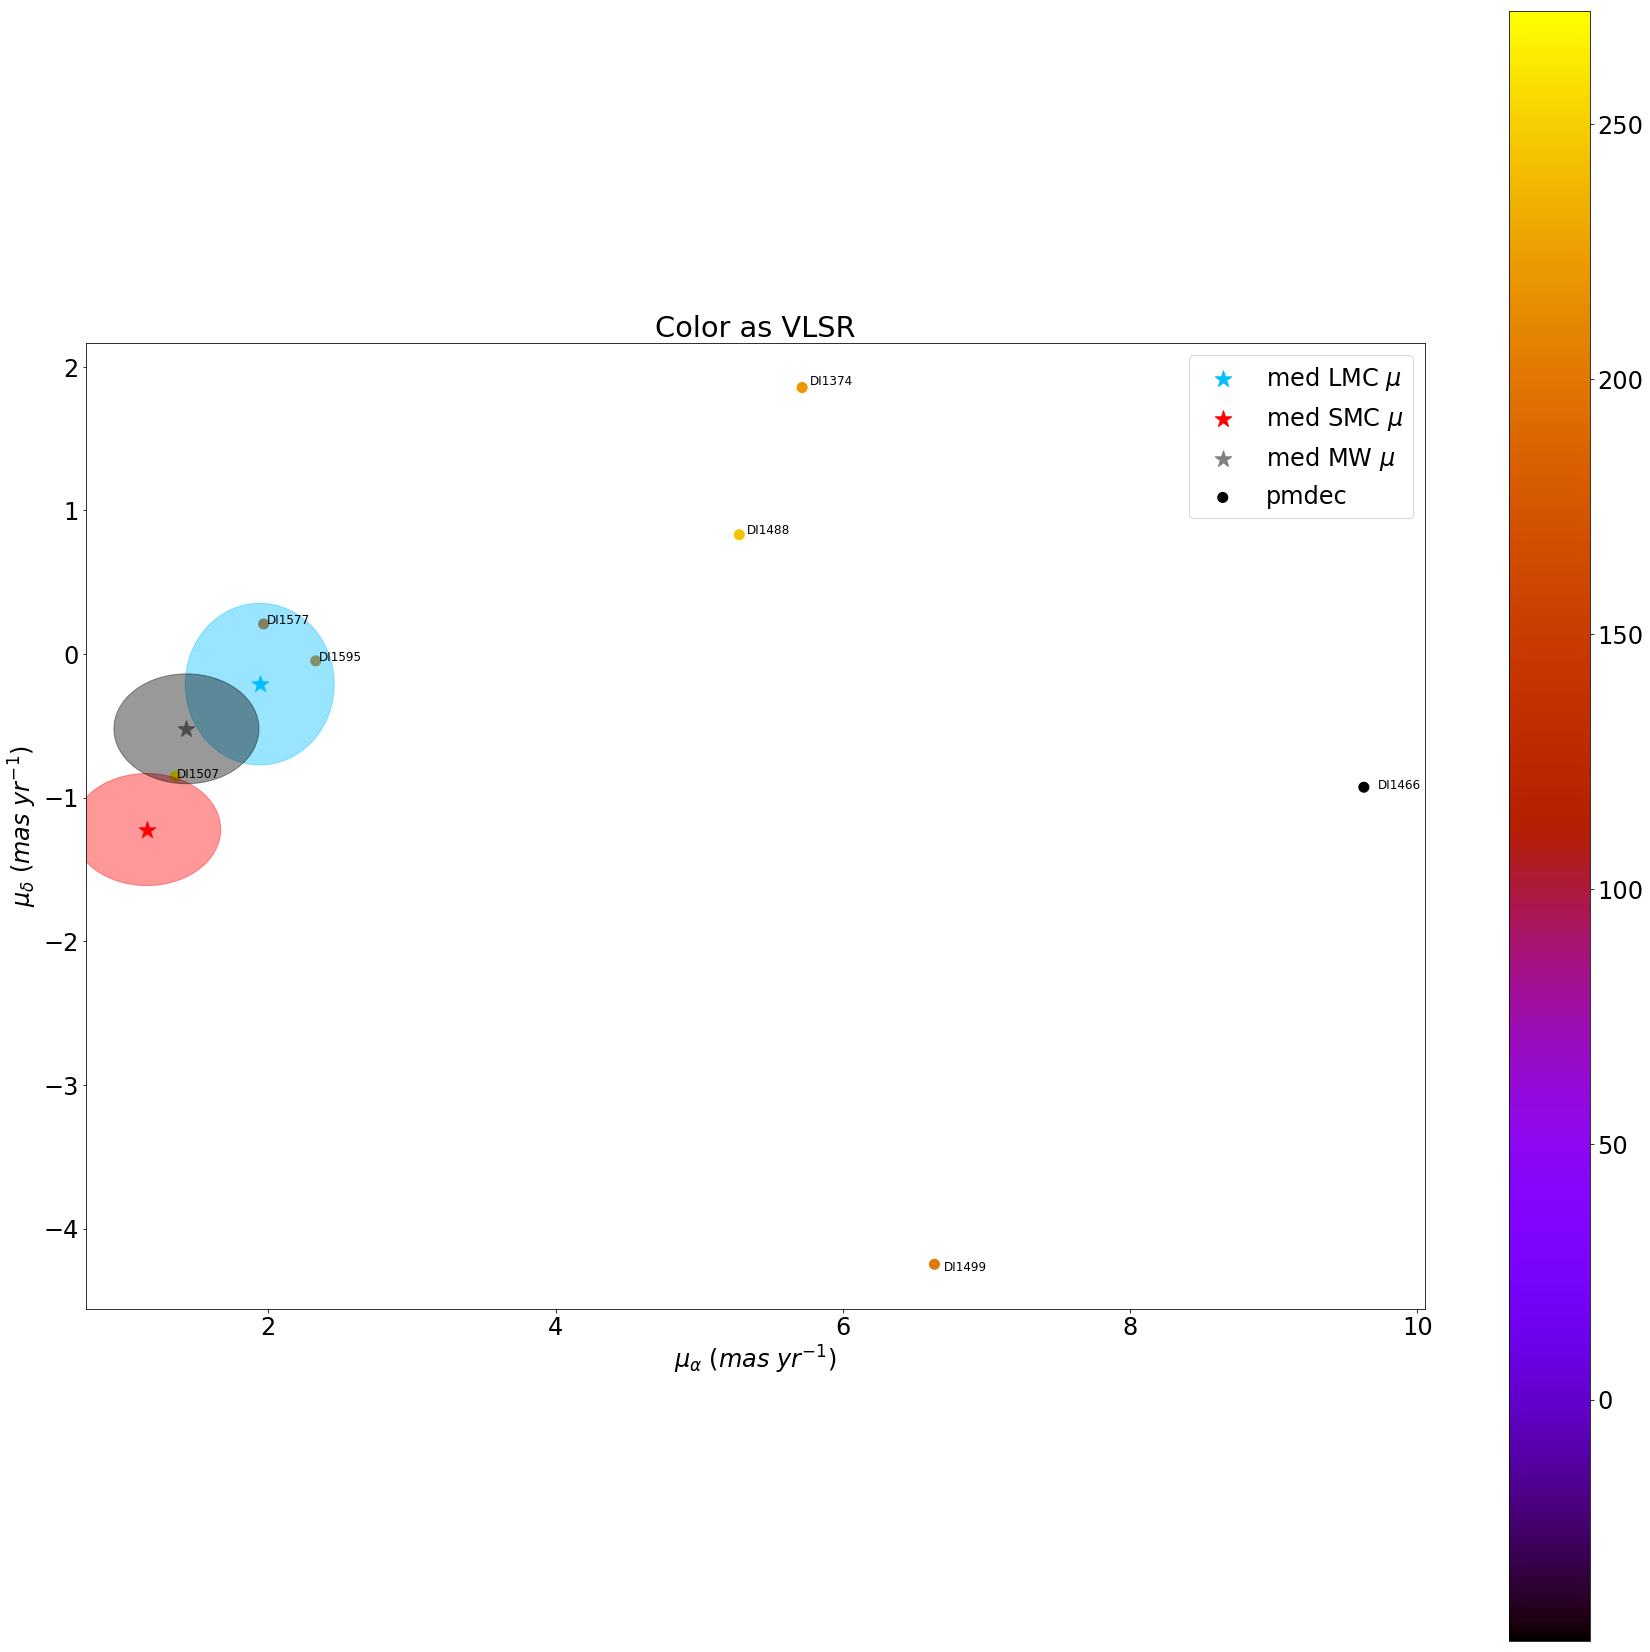

In [26]:
###Median plot with mad ellipses
lfact = 4.0
sfact = 4.0
gtfact = 1.0

outells  = [Ellipse(xy = (np.nanmedian(outlra),np.nanmedian(outldec)),width=mad(outlra)*lfact,\
            height=mad(outldec)*lfact,color='deepskyblue'), Ellipse(xy = (np.nanmedian(outsra),\
            np.nanmedian(outsdec)), width=mad(outsra)*sfact,height=mad(outsdec)*sfact,color='red'), \
            Ellipse(xy = (np.nanmedian(mpmra), np.nanmedian(mpmdec)), \
            width=mad(mpmra)*gtfact,height=mad(mpmdec)*gtfact, color='k',alpha =0.075)]

plt.figure(figsize=[30,30])
a = plt.subplot(111, aspect='equal')

for e in outells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.4)
    a.add_artist(e)

plt.scatter(np.nanmedian(outlra),np.nanmedian(outldec),c='deepskyblue',marker='*',s=300,label='med LMC $\mu$')
plt.scatter(np.nanmedian(outsra),np.nanmedian(outsdec),c='red',marker='*',s=300,label='med SMC $\mu$')
plt.scatter(np.nanmedian(mpmra),np.nanmedian(mpmdec),c='grey',marker='*',s=300,label='med MW $\mu$')

plt.scatter(raprots['pmra'],raprots['pmdec'],c=raprots['VLSR'],s=100,cmap=plt.cm.get_cmap('gnuplot'),\
            alpha=1)
for i in range(len(raprots)):
    plt.text(raprots['pmra'][i]*(1+0.01),raprots['pmdec'][i]*(1+0.01),raprots['NAME'][i],fontsize=12)

#plt.scatter(pure['pmra'],pure['pmdec'],c=pure['VLSR'],s=100,cmap=plt.cm.get_cmap('gnuplot'),\
            #alpha=1)

#window = np.where((np.sqrt(pure['pmra']**2+pure['pmdec']**2)<=300) & (np.sqrt(pure['pmdec']**2+pure['pmdec']**2)>0)) 
#windowpure = pure[window]

#for i in range(len(windowpure)):
#    plt.text(windowpure['pmra'][i]*(1),windowpure['pmdec'][i]*(1),windowpure['NAME'][i],fontsize=8)

plt.colorbar()
plt.title('Color as VLSR')
plt.xlabel('$\mu_{\\alpha}$ $(mas$ $yr^{-1}$)')
plt.ylabel('$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
#plt.xlim(0,6)
#plt.ylim(-3,4)
plt.savefig('dupontstars.pdf',bbox_inches='tight')
plt.legend()
plt.show()